At first, we import the libraries and other essential parameters

In [1]:
import cv2
import glob
import ipyplot
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

The algorithm assumes that all images were collected using the same device and configuration, ensuring that the region of interest has the same size and position in all images.

That said, the first step of the algorithm is to load all the images from which you want to crop the region of interest, respecting the restrictions described above.


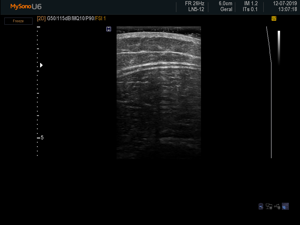
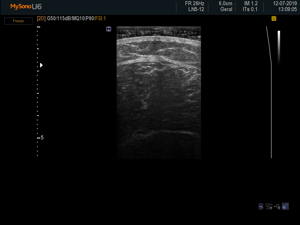
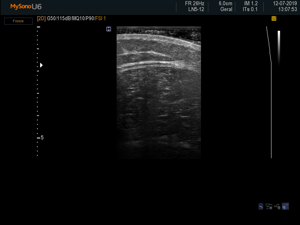
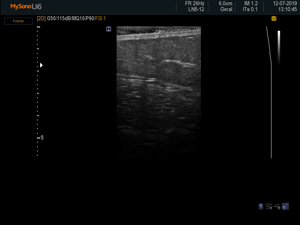
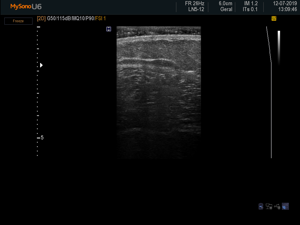
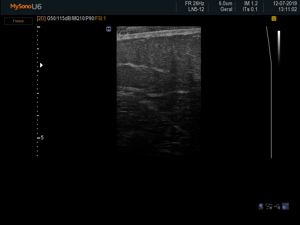
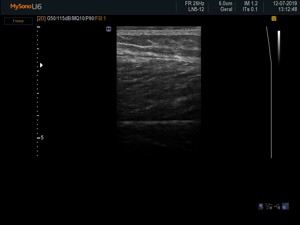
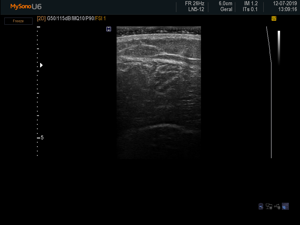
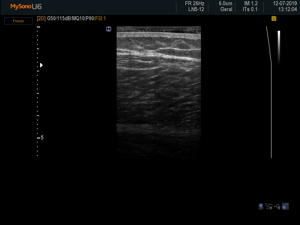
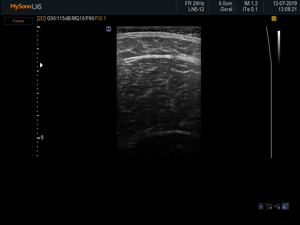
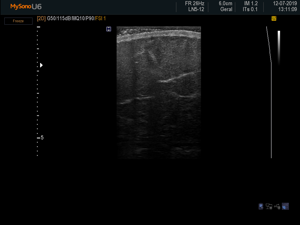
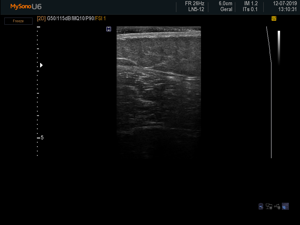


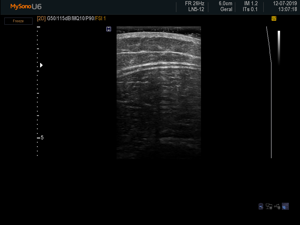
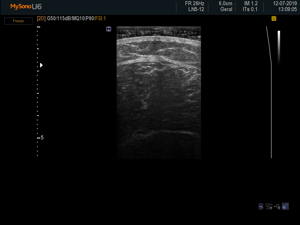
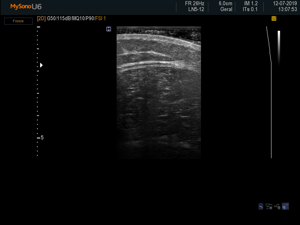
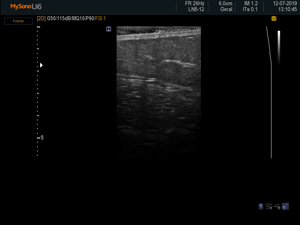
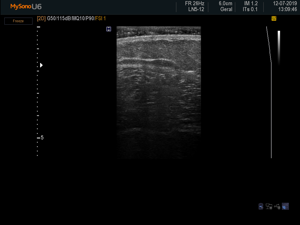
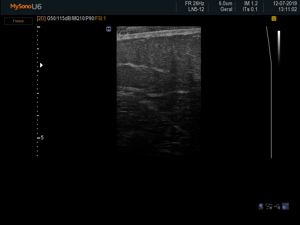
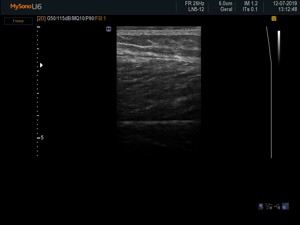
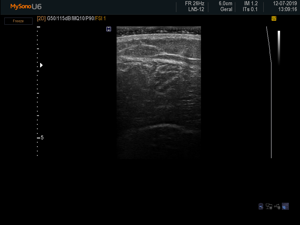
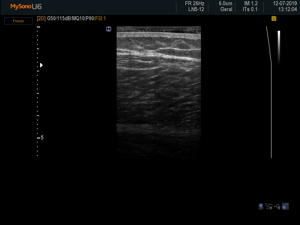
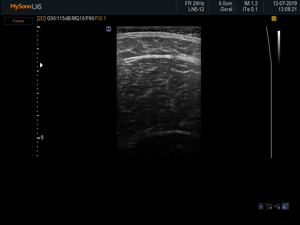
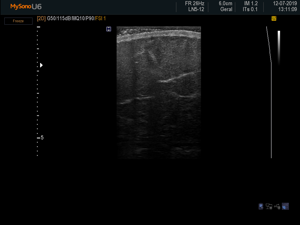
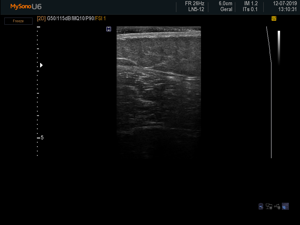

In [2]:
images = [np.asarray(Image.open(img)) for img in glob.glob("./imagens_para_recorte/*")]
ipyplot.plot_images(images,img_width=300)

Once all the images have been loaded, we perform a test and mark in white all the pixels that have a value different from 0.

Remembering that in an image, darker shades have a value that tends towards 0, with 0 being the darkest shade.


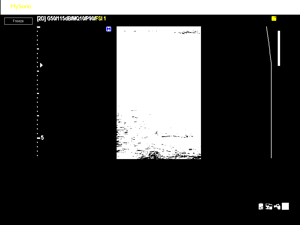
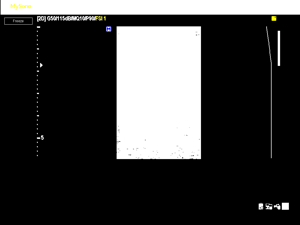
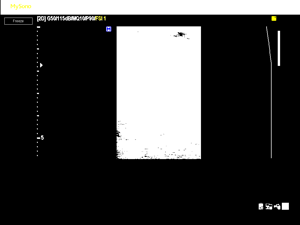
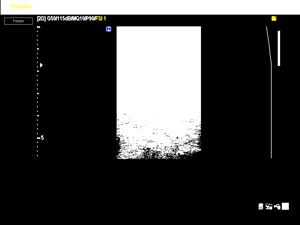
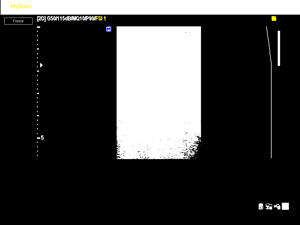
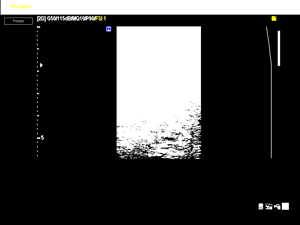
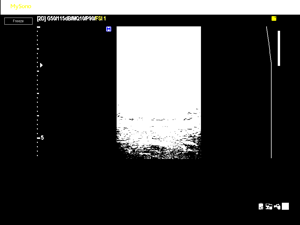
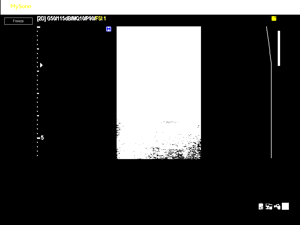
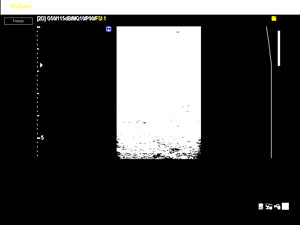
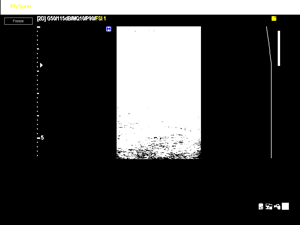
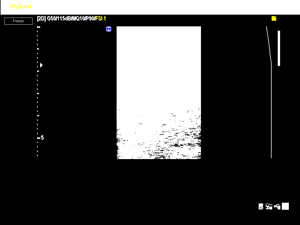
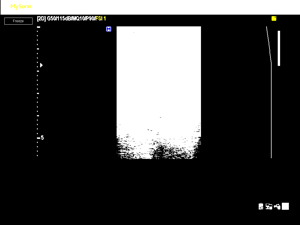


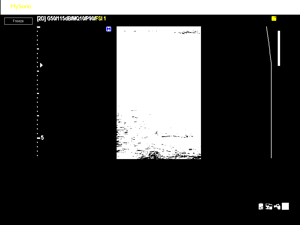
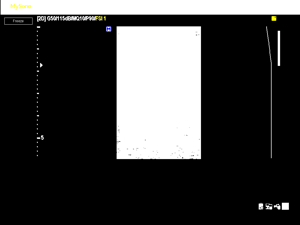
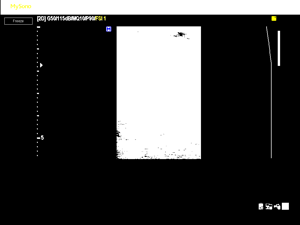
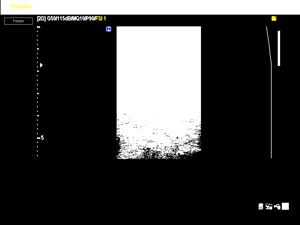
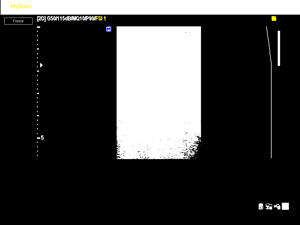
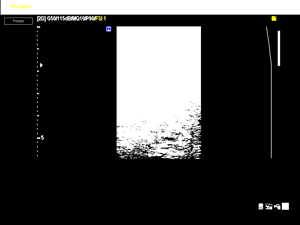
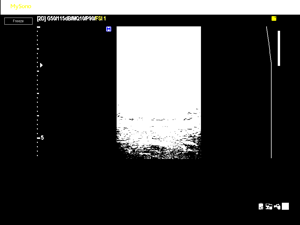
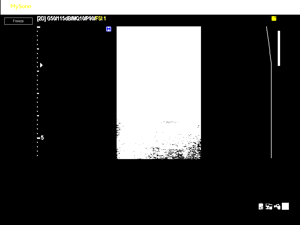
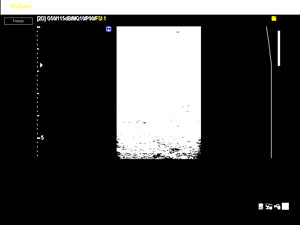
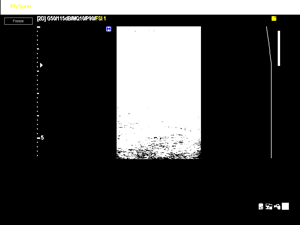
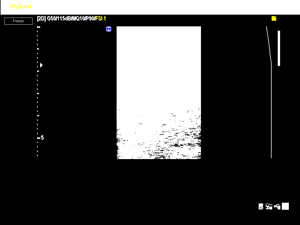
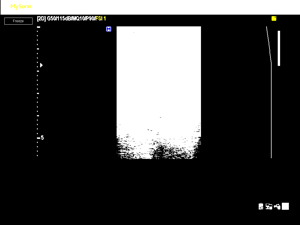

In [3]:
masks = [(img > 0).astype('f4') for img in images]
ipyplot.plot_images(masks,img_width=300)

In the next step, all masks are summed into a single image, and finally, the pixel values are bounded between 0 and 1.

$$
    If\ p\ >\ 1\ than\ p\ =\ 1;
$$
$$
    If\ p\ <\ 0\ than\ p\ =\ 0;  
$$

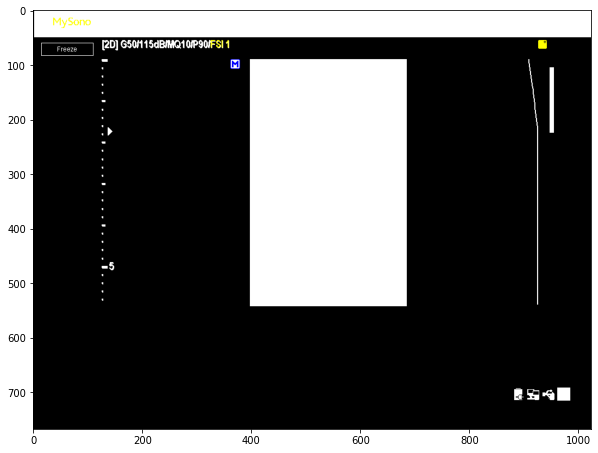

In [4]:
final_mask = np.clip(np.sum(np.array(masks, dtype='f4'),axis=0), 0, 1)

plt.imshow(final_mask)

Continuing, a function is used to find the contours of all objects in the final mask.

    Note: The contours are painted in green for observation purposes only.

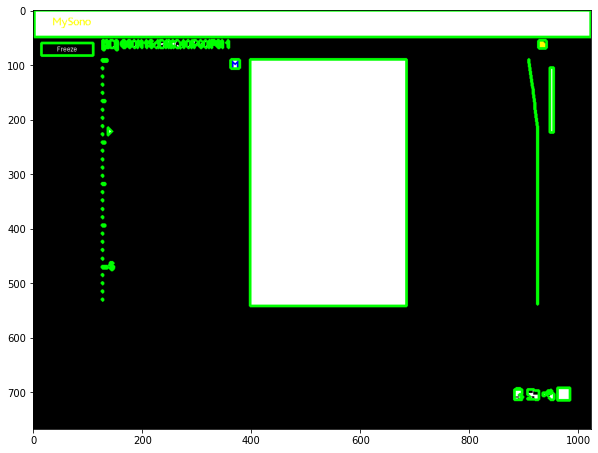

In [5]:
cnts, _ = cv2.findContours(
    cv2.cvtColor((final_mask * 255).astype("u1"), cv2.COLOR_BGR2GRAY),
    mode=cv2.RETR_EXTERNAL,
    method=cv2.CHAIN_APPROX_SIMPLE,
)[-2:]



draw = (final_mask * 255).astype("u1")
cv2.drawContours(draw, cnts, -1, (0,255,0), 3)
plt.imshow(draw)

Among all the contours found, the contour with the largest area is selected.

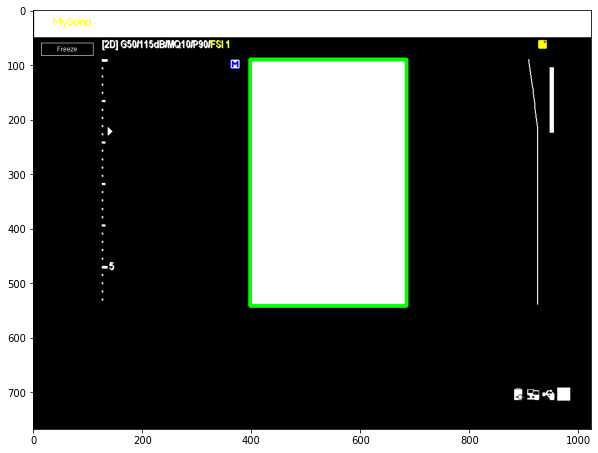

In [6]:
c = max(cnts, key=cv2.contourArea)


draw = (final_mask * 255).astype("u1")
cv2.drawContours(draw, [c], -1, (0,255,0), 5)
plt.imshow(draw)

The coordinates of the rectangle that best fits the found contour are the coordinates we use to crop all the images.

In [7]:
x, y, w, h = cv2.boundingRect(c)
x, y, w, h

(398, 90, 288, 453)

And finally, all images are cropped using the same coordinates.


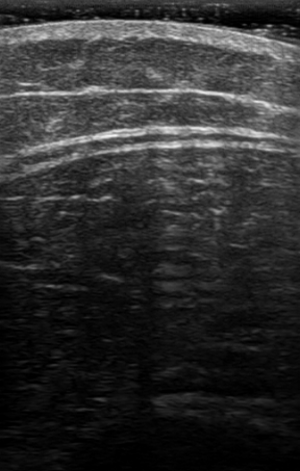
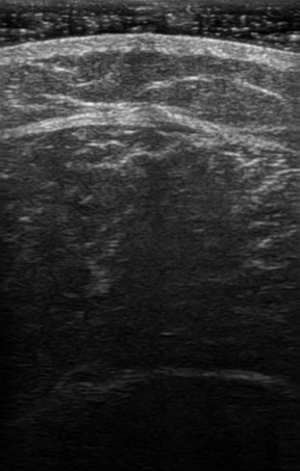
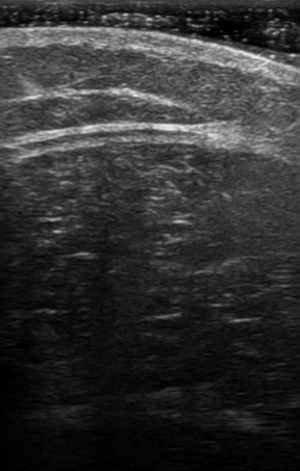
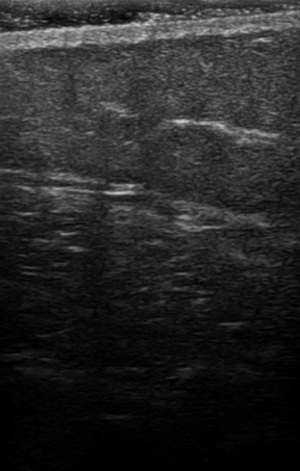
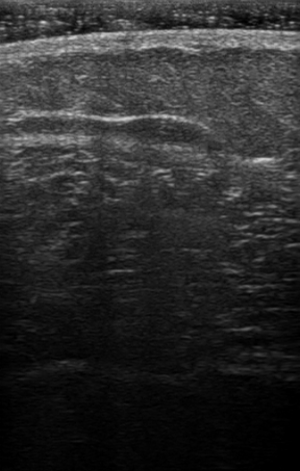
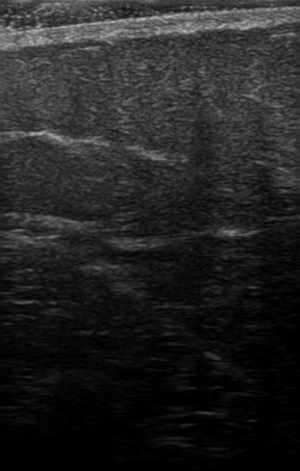
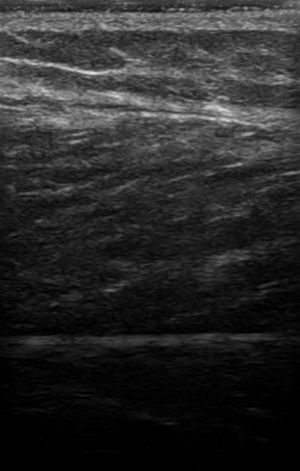
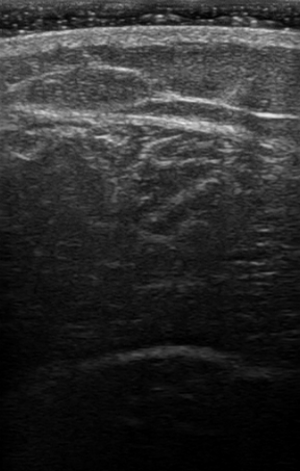
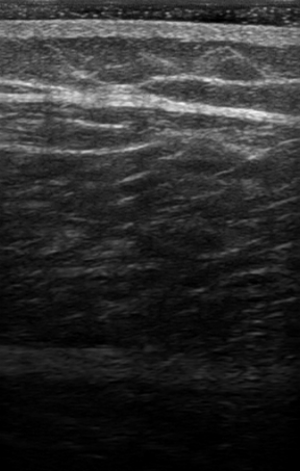
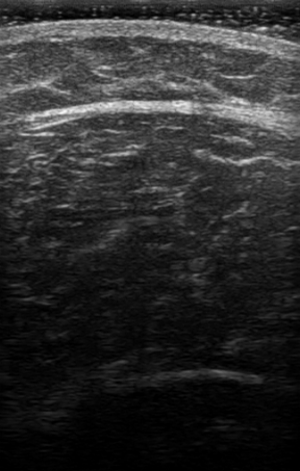
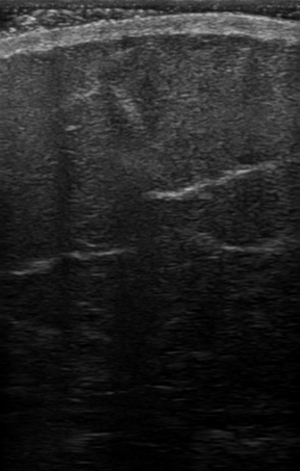
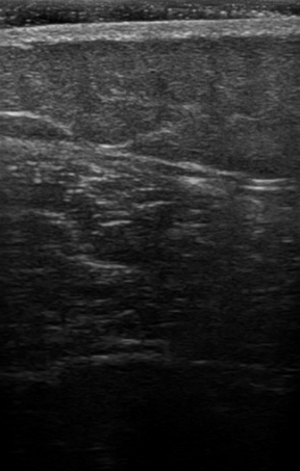


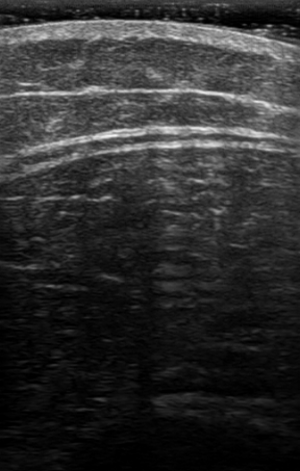
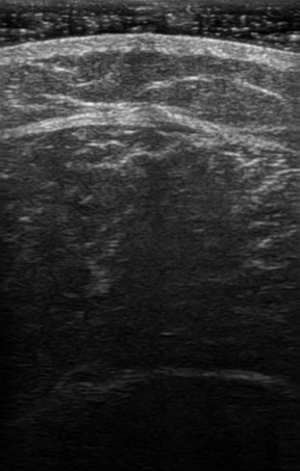
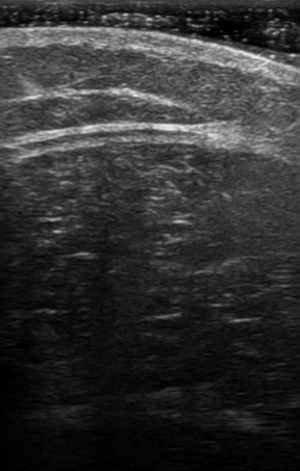
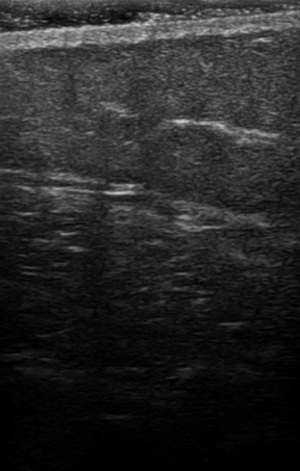
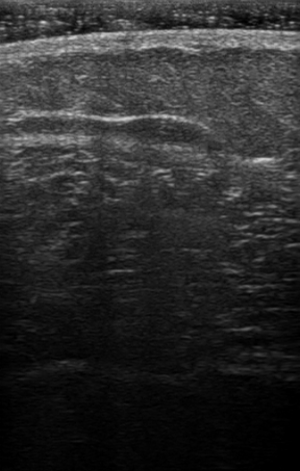
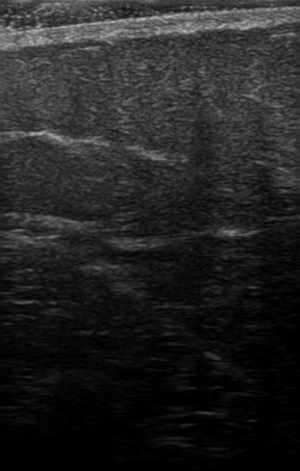
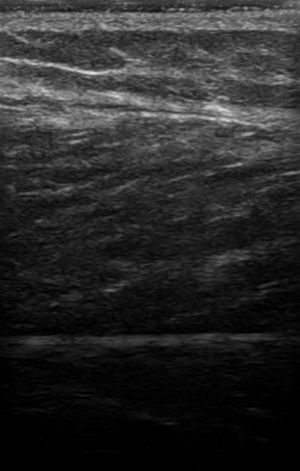
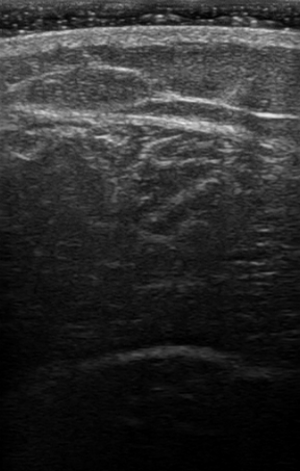
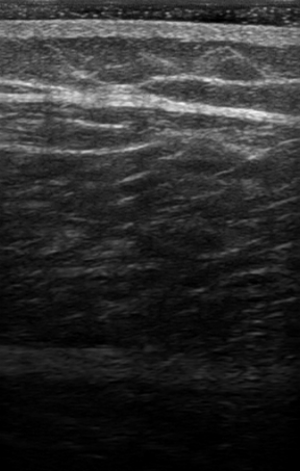
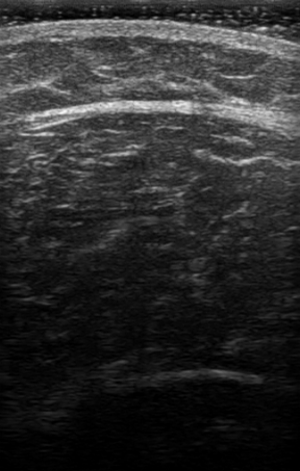
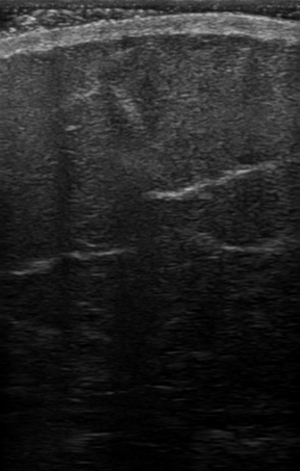
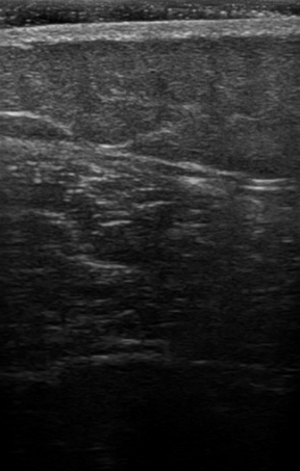

In [8]:
croped = [img[y : y + h, x : x + w] for img in images]

ipyplot.plot_images(croped,img_width=300)

In [9]:
for i, img in enumerate(croped):
    cv2.imwrite(f"MONTAGEM/croped_{i}.png", img)